In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/UAS-AI/Knee-Dataset2/'
if os.path.exists(data_path):
    print("Path exists")
else:
    print("Path does not exist")

Path exists


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

train_dir = data_path

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 577 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [ ]:
num_classes = len(train_generator.class_indices)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.90):
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/50
37/37 - 101s - loss: 0.6113 - accuracy: 0.7036 - val_loss: 0.6039 - val_accuracy: 0.7133 - 101s/epoch - 3s/step
Epoch 2/50
37/37 - 52s - loss: 0.5869 - accuracy: 0.7140 - val_loss: 0.5990 - val_accuracy: 0.7133 - 52s/epoch - 1s/step
Epoch 3/50
37/37 - 51s - loss: 0.5597 - accuracy: 0.7140 - val_loss: 0.6110 - val_accuracy: 0.7133 - 51s/epoch - 1s/step
Epoch 4/50
37/37 - 51s - loss: 0.5487 - accuracy: 0.7140 - val_loss: 0.6368 - val_accuracy: 0.7133 - 51s/epoch - 1s/step
Epoch 5/50
37/37 - 50s - loss: 0.5350 - accuracy: 0.7140 - val_loss: 0.6901 - val_accuracy: 0.7133 - 50s/epoch - 1s/step
Epoch 6/50
37/37 - 49s - loss: 0.5189 - accuracy: 0.7140 - val_loss: 0.6562 - val_accuracy: 0.7133 - 49s/epoch - 1s/step
Epoch 7/50
37/37 - 55s - loss: 0.5278 - accuracy: 0.7071 - val_loss: 0.6287 - val_accuracy: 0.7133 - 55s/epoch - 1s/step
Epoch 8/50
37/37 - 53s - loss: 0.5301 - accuracy: 0.7192 - val_loss: 0.6020 - val_accuracy: 0.7133 - 53s/epoch - 1s/step
Epoch 9/50
37/37 - 50s - loss:

In [ ]:
model.save('model.h5')

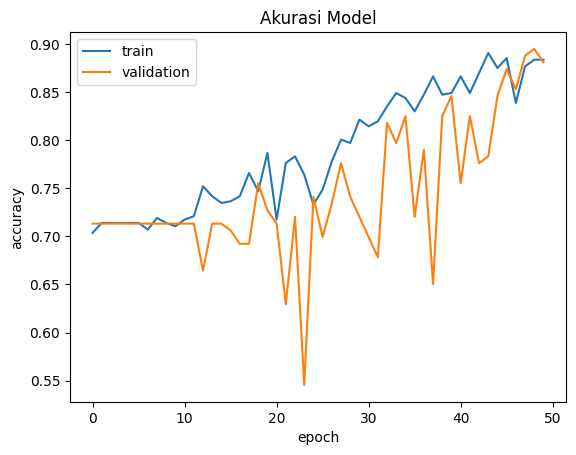

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])

Training Accuracy: [0.7036395072937012, 0.7140381336212158, 0.7140381336212158, 0.7140381336212158, 0.7140381336212158, 0.7140381336212158, 0.7071056962013245, 0.7192374467849731, 0.7140381336212158, 0.7105719447135925, 0.7175043225288391, 0.7209705114364624, 0.7521663904190063, 0.7417677640914917, 0.7348353266716003, 0.7365684509277344, 0.7417677640914917, 0.7660312056541443, 0.746967077255249, 0.7868283987045288, 0.7175043225288391, 0.7764298319816589, 0.7833622097969055, 0.7642980813980103, 0.7331022620201111, 0.7487002015113831, 0.7781628966331482, 0.8006932139396667, 0.7972270250320435, 0.821490466594696, 0.8145580291748047, 0.819757342338562, 0.835355281829834, 0.8492200970649719, 0.8440207839012146, 0.8301559686660767, 0.8474869728088379, 0.8665511012077332, 0.8474869728088379, 0.8492200970649719, 0.8665511012077332, 0.8492200970649719, 0.8700173497200012, 0.8908145427703857, 0.8752166628837585, 0.8856152296066284, 0.8388214707374573, 0.8769497275352478, 0.8838821649551392, 0.88

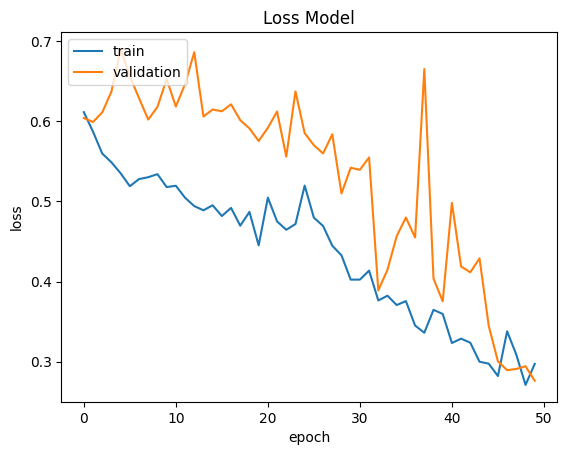

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])

Training Loss: [0.6113011837005615, 0.5868688225746155, 0.5596663951873779, 0.5487250685691833, 0.535010576248169, 0.5189211368560791, 0.5278158783912659, 0.5301300287246704, 0.533967912197113, 0.5178481340408325, 0.5194936394691467, 0.5045560002326965, 0.4941357672214508, 0.4888606667518616, 0.4951561689376831, 0.48174023628234863, 0.4918520748615265, 0.46968573331832886, 0.4868202209472656, 0.4451438784599304, 0.5046883225440979, 0.4750416576862335, 0.4645788371562958, 0.4717501401901245, 0.5197071433067322, 0.4796157777309418, 0.4693407714366913, 0.4447079598903656, 0.4327646791934967, 0.4024496376514435, 0.40243247151374817, 0.41367053985595703, 0.37644100189208984, 0.3823802173137665, 0.37070325016975403, 0.37565863132476807, 0.3451555073261261, 0.3362111449241638, 0.36474719643592834, 0.35958367586135864, 0.3233920931816101, 0.3288167417049408, 0.32371512055397034, 0.30003583431243896, 0.2976241707801819, 0.28220686316490173, 0.33799779415130615, 0.30876806378364563, 0.2711111605

In [ ]:
label_to_index = train_generator.class_indices
print(label_to_index)

{'Normal': 0, 'Osteoarthritis': 1}


1/1 [==============================] - 1s 1s/step


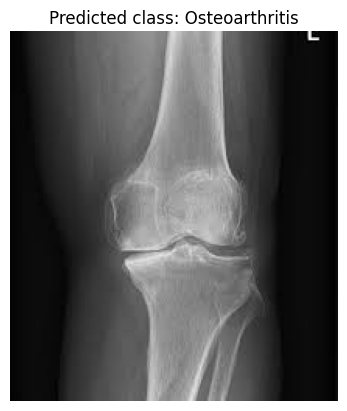

Predicted class: Osteoarthritis
Predictions: [[0.10977892 0.8902211 ]]


In [ ]:
model = tf.keras.models.load_model('model.h5')

def process_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_image(img_path):
    img_array = process_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class, predictions

def show_image_with_prediction(img_path):
    img = Image.open(img_path)
    predicted_class, predictions = predict_image(img_path)

    label_to_index = train_generator.class_indices
    index_to_label = {v: k for k, v in label_to_index.items()}
    predicted_label = index_to_label[predicted_class[0]]

    plt.imshow(img)
    plt.title(f'Predicted class: {predicted_label}')
    plt.axis('off')
    plt.show()

    print(f"Predicted class: {predicted_label}")
    print(f"Predictions: {predictions}")

img_path = '/content/drive/MyDrive/KNEE_X-RAY/download.jpeg'
show_image_with_prediction(img_path)